In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jehanbhathena/weather-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/weather-dataset


In [ ]:
import os # Import the os module

# Correct path to dataset
dataset_path = "/kaggle/input/weather-dataset/dataset"

# Verify the dataset structure
print(f"Directory contents: {os.listdir(dataset_path)}")

# Now, check for the weather condition folders (like 'dew', 'fogsmog', etc.)
weather_conditions = [
    'dew', 'fogsmog', 'frost', 'glaze', 'hail',
    'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow'
]

for condition in weather_conditions:
    condition_folder = os.path.join(dataset_path, condition)
    if os.path.exists(condition_folder):
        print(f"Found folder: {condition_folder}")
    else:
        print(f"Folder not found: {condition_folder}")

Directory contents: ['hail', 'rainbow', 'frost', 'rime', 'fogsmog', 'snow', 'rain', 'glaze', 'lightning', 'sandstorm', 'dew']
Found folder: /kaggle/input/weather-dataset/dataset/dew
Found folder: /kaggle/input/weather-dataset/dataset/fogsmog
Found folder: /kaggle/input/weather-dataset/dataset/frost
Found folder: /kaggle/input/weather-dataset/dataset/glaze
Found folder: /kaggle/input/weather-dataset/dataset/hail
Found folder: /kaggle/input/weather-dataset/dataset/lightning
Found folder: /kaggle/input/weather-dataset/dataset/rain
Found folder: /kaggle/input/weather-dataset/dataset/rainbow
Found folder: /kaggle/input/weather-dataset/dataset/rime
Found folder: /kaggle/input/weather-dataset/dataset/sandstorm
Found folder: /kaggle/input/weather-dataset/dataset/snow


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models

# Define the dataset path (corrected path)
dataset_path = "/kaggle/input/weather-dataset/dataset"

# Weather conditions (folder names)
weather_conditions = [
    'dew', 'fogsmog', 'frost', 'glaze', 'hail',
    'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow'
]


In [ ]:
# Image size to which images will be resized
image_size = (128, 128)

# Function to load and preprocess images
def load_images_from_folder(folder, label, image_size=image_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load all images and labels
all_images = []
all_labels = []
for idx, condition in enumerate(weather_conditions):
    folder_path = os.path.join(dataset_path, condition)
    if os.path.exists(folder_path):  # Check if folder exists
        images, labels = load_images_from_folder(folder_path, idx)
        all_images.extend(images)
        all_labels.extend(labels)
    else:
        print(f"Folder not found: {folder_path}")

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [ ]:
# Split dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.3, stratify=all_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

In [ ]:
# CNN Model creation
def create_cnn_model(input_shape=(128, 128, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(11, activation='softmax')  # 11 weather categories
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Build the model
model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8409 - loss: 0.7557 - val_accuracy: 0.8883 - val_loss: 0.4534
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9530 - loss: 0.1731 - val_accuracy: 0.8917 - val_loss: 0.4692
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9807 - loss: 0.0773 - val_accuracy: 0.8813 - val_loss: 0.6481
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9861 - loss: 0.0465 - val_accuracy: 0.8924 - val_loss: 0.6114
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9991 - loss: 0.0115 - val_accuracy: 0.8848 - val_loss: 0.7806
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9983 - loss: 0.0105 - val_accuracy: 0.8987 - val_loss: 0.6974
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.8910 - val_loss: 0.7619
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9999 - loss: 0.0022 - val_accu

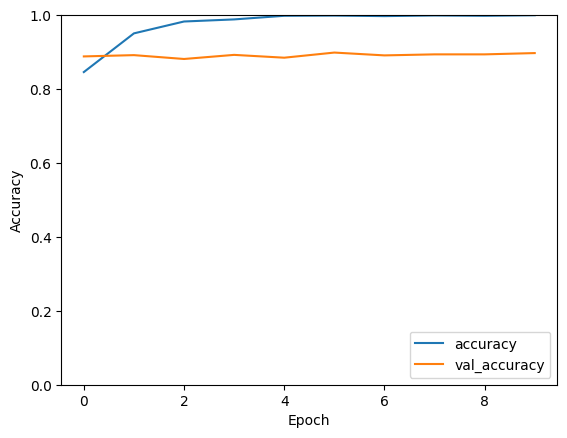

In [ ]:

# Visualization of training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)

# Function to visualize sample predictions
def plot_predictions(images, labels, predictions):
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    axes = axes.ravel()
    for i in np.arange(10):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(f"True: {weather_conditions[labels[i]]}\nPred: {weather_conditions[predictions[i]]}")
        ax.axis('off')
    plt.subplots_adjust(wspace=0.5)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


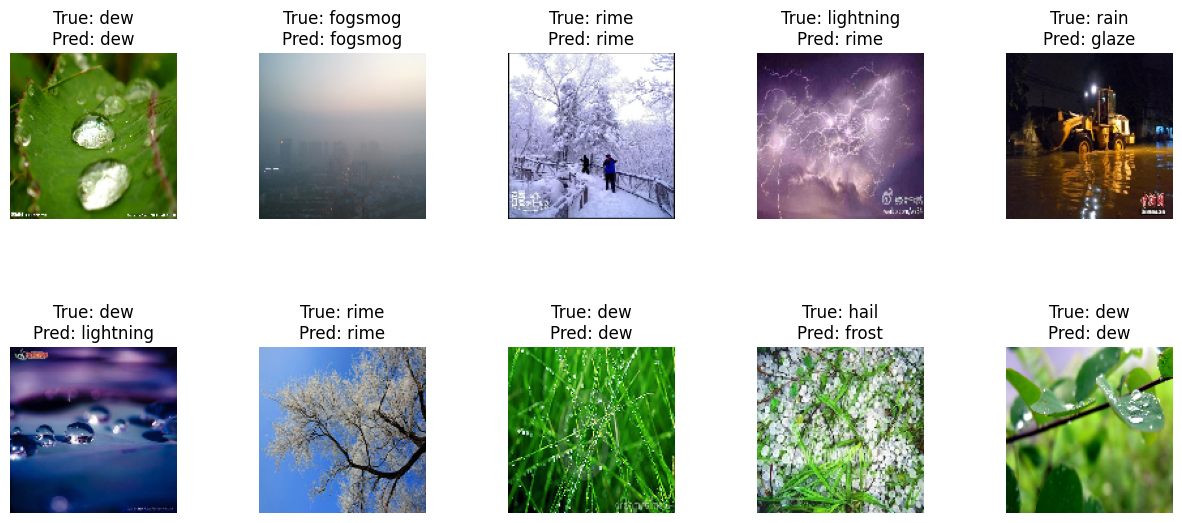

In [ ]:
# Make predictions on the test set
predictions = np.argmax(model.predict(X_test[:10]), axis=1)
plot_predictions(X_test[:10], y_test[:10], predictions)

In [ ]:
model.save('weather_model.h5')

In [ ]:
# Convert images to grayscale for comparison
def convert_to_grayscale(images):
    return np.array([np.mean(img, axis=-1, keepdims=True) for img in images])

# Convert to grayscale
X_train_gray = convert_to_grayscale(X_train)
X_val_gray = convert_to_grayscale(X_val)
X_test_gray = convert_to_grayscale(X_test)

# Reshape to add channel dimension
X_train_gray = np.repeat(X_train_gray, 3, axis=-1)  # Repeat to have 3 channels
X_val_gray = np.repeat(X_val_gray, 3, axis=-1)
X_test_gray = np.repeat(X_test_gray, 3, axis=-1)

In [ ]:
# Build and train the model with grayscale images
model_gray = create_cnn_model(input_shape=(128, 128, 3))
history_gray = model_gray.fit(X_train_gray, y_train, epochs=10, validation_data=(X_val_gray, y_val), batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.3024 - loss: 1.9896 - val_accuracy: 0.4663 - val_loss: 1.5321
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4963 - loss: 1.3969 - val_accuracy: 0.4962 - val_loss: 1.4153
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6056 - loss: 1.1394 - val_accuracy: 0.5441 - val_loss: 1.3054
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6712 - loss: 0.9603 - val_accuracy: 0.5309 - val_loss: 1.3850
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7450 - loss: 0.7312 - val_accuracy: 0.5566 - val_loss: 1.4501
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8242 - loss: 0.5063 - val_accuracy: 0.5607 - val_loss: 1.7751
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8717 - loss: 0.3739 - val_accuracy: 0.5344 - val_loss: 1.8757
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9377 - loss: 0.2040 - val_accu

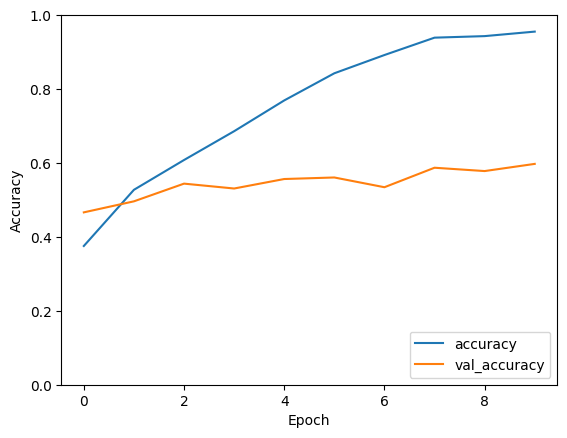

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


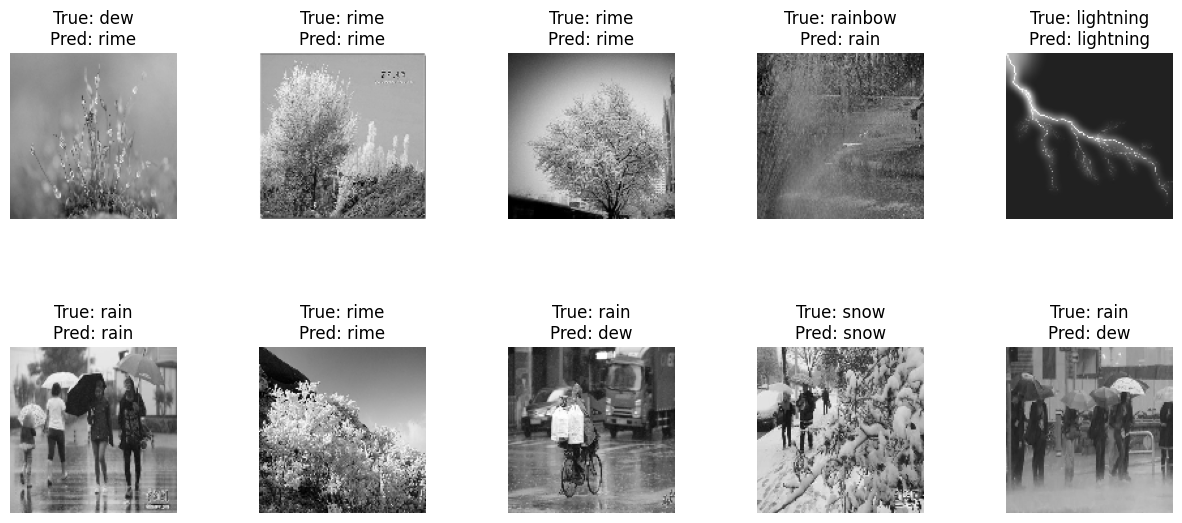

In [ ]:
# Visualize training history for grayscale model
plot_history(history_gray)

# Make predictions on the test set with grayscale model
predictions_gray = np.argmax(model_gray.predict(X_test_gray[:10]), axis=1)
plot_predictions(X_test_gray[:10], y_test[:10], predictions_gray)

In [ ]:
model_gray.save('weather_model_gray.h5')


Saving 2209.jpg to 2209.jpg
File 2209.jpg found. Making predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted weather condition: frost


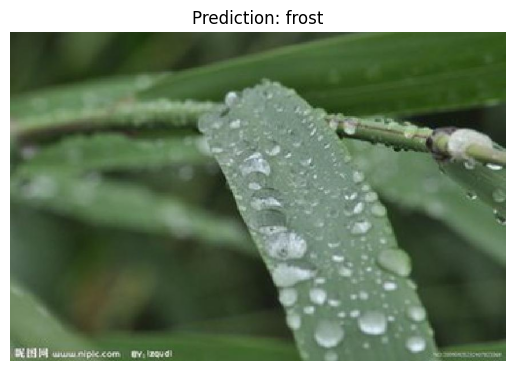

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Weather conditions (folder names)
weather_conditions = [
    'dew', 'fogsmog', 'frost', 'glaze', 'hail',
    'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow'
]

# Load your trained model (assuming the model is saved as 'weather_model.h5')
model = load_model('weather_model.h5')  # Change the model file name if necessary

# Function to load and preprocess a new image (from file)
def preprocess_image(img_path, target_size=(128, 128)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict the weather condition for an uploaded image
def predict_weather(img_path, model):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_weather = weather_conditions[predicted_class[0]]
    print(f"Predicted weather condition: {predicted_weather}")

    # Display the image and prediction
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_weather}")
    plt.axis('off')
    plt.show()

# Function to upload a file and predict its weather condition
def upload_file(uploaded_files):
    for filename in uploaded_files.keys():
        file_path = '/content/' + filename  # Save file in Colab's environment
        with open(file_path, 'wb') as f:
            f.write(uploaded_files[filename])

        print(f"File {filename} found. Making predictions...")
        predict_weather(file_path, model)

# # Example usage: upload a file using Google Colab
from google.colab import files
uploaded_files = files.upload()
upload_file(uploaded_files)
